# Sentiment Analysis Dashboard
This AI-powered project provides an interactive dashboard built with tkinter that allows users to input movie reviews and analyze their sentiments. The application captures user-submitted reviews through a user-friendly interface, stores them in a CSV file, and applies sentiment analysis techniques to classify the reviews as positive, negative, or neutral. It leverages natural language processing (NLP) to understand the tone of each review and visualizes the results through insightful graphs and charts. This tool is especially useful for gaining audience feedback, monitoring opinions, and drawing meaningful conclusions from large sets of text data.


MCA 2025 Batch

Team-name : Tech Tribe

Team-Member : Vikas Singh, Tushar Kumar, Vanshika Shrivastva, Vanshika Tyagi

Subject : Introduction to AI

Code : AI101B

In [1]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from datetime import datetime
import os
import seaborn as sns # type: ignore

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Initialize CSV file
csv_file = 'movie_reviews.csv'
if not os.path.exists(csv_file):
    pd.DataFrame(columns=['Movie Name', 'Director', 'Release Year', 'Story', 'Genre', 'Rating', 'Character Rating', 'User Comments', 'Timestamp']).to_csv(csv_file, index=False)

NameError: name 'os' is not defined

In [ ]:
# Function to save user input to CSV
def save_to_csv(data):
    df = pd.read_csv(csv_file)
    df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
    df.to_csv(csv_file, index=False)

In [ ]:
# Function to handle form submission
def submit():
    try:
        # Collect data from input fields
        data = {
            'Movie Name': movie_name.get(),
            'Director': director.get(),
            'Release Year': release_year.get(),
            'Story': story.get(),
            'Genre': genre.get(),
            'Rating': int(rating.get()),
            'Character Rating': int(character_rating.get()),
            'User Comments': user_comments.get(),
            'Timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }

        # Save data to CSV
        save_to_csv(data)
        messagebox.showinfo('Success', 'Data saved successfully!')

    except ValueError as ve:
        messagebox.showerror('Error', f'Invalid input: {ve}')
    except Exception as e:
        messagebox.showerror('Error', f'An unexpected error occurred: {e}')

In [ ]:
# Function to analyze data and display basic statistics
def analyze_data():
    df = pd.read_csv(csv_file)
    if df.empty:
        tk.messagebox.showwarning('Warning', 'No data available in the CSV file.')
        return

    mean_rating = df['Rating'].mean()
    median_rating = df['Rating'].median()
    mode_rating = df['Rating'].mode()[0] if not df['Rating'].mode().empty else 'N/A'

    tk.messagebox.showinfo('Statistics', f"Mean Rating: {mean_rating}\nMedian Rating: {median_rating}\nMode Rating: {mode_rating}")

    # Plot overall ratings distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Rating', palette='viridis')
    plt.title('Overall Ratings Distribution')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.show()

    # Plot overall rating distribution by genre
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='Genre', y='Rating', palette='coolwarm')
    plt.title('Rating Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Function to analyze feedback for user-selected movies
def analyze_movie_feedback():
    df = pd.read_csv(csv_file)
    if df.empty:
        tk.messagebox.showwarning('Warning', 'No data available in the CSV file.')
        return

    movie_names = list(df['Movie Name'].dropna().unique())  # Ensure unique and clean movie names

    feedback_window = tk.Toplevel(root)
    feedback_window.title('Analyze Movie Feedback')
    feedback_window.geometry('400x300')
    feedback_window.configure(bg='#f0f8ff')

    tk.Label(feedback_window, text='Select Movie:', font=('Arial', 14), bg='#f0f8ff').pack(pady=10)

    selected_movie = tk.StringVar()
    movie_dropdown = ttk.Combobox(feedback_window, textvariable=selected_movie, values=movie_names, font=('Arial', 12), width=30)
    movie_dropdown.pack(pady=10)

    def analyze_selected_movie():
        movie = selected_movie.get()
        if not movie:
            messagebox.showwarning('Warning', 'Please select a movie.')
            return

        movie_data = df[df['Movie Name'] == movie]
        if movie_data.empty:
            messagebox.showwarning('Warning', 'No data available for the selected movie.')
            return

        # Aggregate feedback data for the selected movie
        like_count = (movie_data['Rating'] >= 4).sum()
        dislike_count = (movie_data['Rating'] < 4).sum()

        sns.barplot(x=['Like', 'Dislike'], y=[like_count, dislike_count], palette=['green', 'red'])
        plt.title(f"Feedback for '{movie}'")
        plt.xlabel('Feedback')
        plt.ylabel('Count')
        plt.show()

    tk.Button(feedback_window, text='Analyze', command=analyze_selected_movie, bg='#4682b4', fg='white', font=('Arial', 12), width=15).pack(pady=20)
    feedback_window.mainloop()

In [ ]:
# Function to select a movie from the CSV file and analyze it
def select_movie_and_analyze():
    df = pd.read_csv(csv_file)
    if df.empty:
        messagebox.showwarning('Warning', 'No data available in the CSV file.')
        return

    movie_names = df['Movie Name'].unique()

    selection_window = tk.Toplevel(root)
    selection_window.title('Select a Movie for Analysis')
    selection_window.geometry('400x300')
    selection_window.configure(bg='#f0f8ff')

    tk.Label(selection_window, text='Movie Name:', font=('Arial', 14), bg='#f0f8ff').pack(pady=10)

    selected_movie = tk.StringVar()
    movie_dropdown = ttk.Combobox(selection_window, textvariable=selected_movie, values=movie_names, font=('Arial', 12), width=30)
    movie_dropdown.pack(pady=10)

    def analyze_selected_movie():
        movie = selected_movie.get()
        if not movie:
            messagebox.showwarning('Warning', 'Please select a movie.')
            return

        movie_data = df[df['Movie Name'] == movie]
        if movie_data.empty:
            messagebox.showwarning('Warning', 'No data available for the selected movie.')
            return

        # Calculate statistics for the selected movie
        mean_rating = movie_data['Rating'].mean()
        median_rating = movie_data['Rating'].median()
        mode_rating = movie_data['Rating'].mode()[0] if not movie_data['Rating'].mode().empty else 'N/A'

        messagebox.showinfo('Movie Statistics', f"Movie: {movie}\nMean Rating: {mean_rating}\nMedian Rating: {median_rating}\nMode Rating: {mode_rating}")

        # Plot ratings distribution for the selected movie
        plt.figure(figsize=(10, 6))
        sns.countplot(data=movie_data, x='Rating', palette='viridis')
        plt.title(f'Ratings Distribution for {movie}')
        plt.xlabel('Ratings')
        plt.ylabel('Count')
        plt.show()

        # Compare with other movies of the same genre
        genre = movie_data['Genre'].iloc[0]
        genre_data = df[df['Genre'] == genre]

        if genre_data.empty:
            messagebox.showwarning('Warning', f'No other movies found in the genre: {genre}')
            return

        # Plot comparison of mean ratings within the same genre
        genre_mean_ratings = genre_data.groupby('Movie Name')['Rating'].mean().reset_index()
        plt.figure(figsize=(12, 6))
        sns.barplot(data=genre_mean_ratings, x='Movie Name', y='Rating', palette='coolwarm')
        plt.title(f'Comparison of Mean Ratings in Genre: {genre}')
        plt.xlabel('Movie Name')
        plt.ylabel('Mean Rating')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    tk.Button(selection_window, text='Analyze', command=analyze_selected_movie, bg='#4682b4', fg='white', font=('Arial', 12), width=15).pack(pady=20)
    selection_window.mainloop()

In [ ]:
# Function to suggest movies based on genre with improved layout and background colors
def suggest_movie_by_genre():
    df = pd.read_csv(csv_file)
    if df.empty:
        messagebox.showwarning('Warning', 'No data available in the CSV file.')
        return

    # Create a new window for genre input
    suggestion_window = tk.Toplevel(root)
    suggestion_window.title('Suggest Movies by Genre')
    suggestion_window.geometry('1024x700')
    suggestion_window.configure(bg='#f0f8ff')

    # Add a scrollable frame
    canvas = tk.Canvas(suggestion_window, bg='#f0f8ff')
    scroll_y = tk.Scrollbar(suggestion_window, orient='vertical', command=canvas.yview)
    scrollable_frame = tk.Frame(canvas, bg='#f0f8ff')

    scrollable_frame.bind(
        '<Configure>',
        lambda e: canvas.configure(scrollregion=canvas.bbox('all'))
    )

    canvas.create_window((0, 0), window=scrollable_frame, anchor='nw')
    canvas.configure(yscrollcommand=scroll_y.set)

    canvas.pack(side='left', fill='both', expand=True)
    scroll_y.pack(side='right', fill='y')

    tk.Label(scrollable_frame, text='Enter Genre:', font=('Arial', 14, 'bold'), bg='#f0f8ff').pack(pady=10)

    genre_input = tk.StringVar()
    genre_entry = tk.Entry(scrollable_frame, textvariable=genre_input, font=('Arial', 12), width=30)
    genre_entry.pack(pady=10)

    def find_suggestions():
        genre = genre_input.get().strip().lower()
        if not genre:
            messagebox.showwarning('Warning', 'Please enter a genre.')
            return

        # Filter data by genre
        genre_data = df[df['Genre'].str.lower() == genre]
        if genre_data.empty:
            messagebox.showwarning('Warning', f'No movies found for the genre: {genre}')
            return

        # Find movies with the highest mean, median, and mode ratings
        mean_movie = genre_data.loc[genre_data['Rating'].idxmax()]
        median_rating = genre_data['Rating'].median()
        median_movie = genre_data.iloc[(genre_data['Rating'] - median_rating).abs().argsort().iloc[0]]
        mode_rating = genre_data['Rating'].mode()[0] if not genre_data['Rating'].mode().empty else None
        mode_movies = genre_data[genre_data['Rating'] == mode_rating] if mode_rating is not None else None

        # Display the suggested movies with additional details
        suggestions_frame = tk.Frame(scrollable_frame, bg='#e6f7ff', padx=10, pady=10)
        suggestions_frame.pack(fill='x', pady=10)

        tk.Label(suggestions_frame, text=f"Suggested Movies in Genre: {genre}", font=('Arial', 14, 'bold'), bg='#e6f7ff').pack(anchor='w')

        tk.Label(suggestions_frame, text=f"Highest Mean Rating:\nMovie: {mean_movie['Movie Name']}\nRating: {mean_movie['Rating']}\nStory: {mean_movie['Story']}\nUser Comments: {mean_movie['User Comments']}\nRelease Year: {mean_movie['Release Year']}", font=('Arial', 12), bg='#e6f7ff', justify='left', anchor='w').pack(anchor='w', pady=5)

        tk.Label(suggestions_frame, text=f"Closest to Median Rating:\nMovie: {median_movie['Movie Name']}\nRating: {median_rating}\nStory: {median_movie['Story']}\nUser Comments: {median_movie['User Comments']}\nRelease Year: {median_movie['Release Year']}", font=('Arial', 12), bg='#e6f7ff', justify='left', anchor='w').pack(anchor='w', pady=5)

        if mode_movies is not None:
            tk.Label(suggestions_frame, text="Most Frequent Rating (Mode):", font=('Arial', 12, 'bold'), bg='#e6f7ff').pack(anchor='w', pady=5)
            for _, row in mode_movies.iterrows():
                tk.Label(suggestions_frame, text=f"Movie: {row['Movie Name']}\nRating: {mode_rating}\nStory: {row['Story']}\nUser Comments: {row['User Comments']}\nRelease Year: {row['Release Year']}", font=('Arial', 12), bg='#e6f7ff', justify='left', anchor='w').pack(anchor='w', pady=5)

        # Add a list of all movies in the genre
        tk.Label(suggestions_frame, text="List of Movies in Genre:", font=('Arial', 12, 'bold'), bg='#e6f7ff').pack(anchor='w', pady=5)
        for _, row in genre_data.iterrows():
            tk.Label(suggestions_frame, text=f"- {row['Movie Name']} (Release Year: {row['Release Year']})", font=('Arial', 12), bg='#e6f7ff', justify='left', anchor='w').pack(anchor='w', pady=2)

        # Plot comparison of mean ratings within the same genre
        genre_mean_ratings = genre_data.groupby('Movie Name')['Rating'].mean().reset_index()
        plt.figure(figsize=(12, 6))
        sns.barplot(data=genre_mean_ratings, x='Movie Name', y='Rating', palette='coolwarm')
        plt.title(f'Comparison of Mean Ratings in Genre: {genre}')
        plt.xlabel('Movie Name')
        plt.ylabel('Mean Rating')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    tk.Button(scrollable_frame, text='Suggest', command=find_suggestions, bg='#4682b4', fg='white', font=('Arial', 12), width=15).pack(pady=20)

    suggestion_window.mainloop()  # Ensure this is called only once

Error while destroying the existing dashboard: can't invoke "winfo" command: application has been destroyed


C:\Users\87506\AppData\Local\Temp\ipykernel_15024\2548797171.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', palette='viridis')


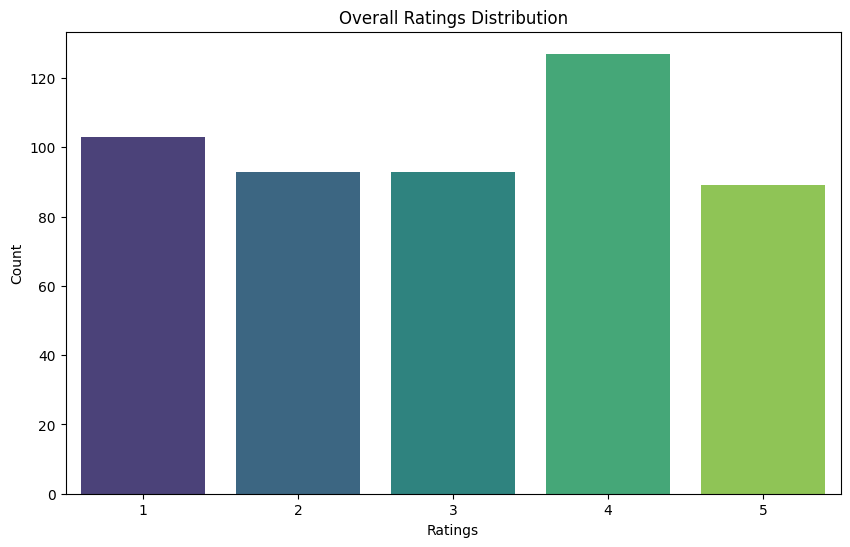

In [ ]:
# Create the main dashboard
def create_dashboard():
    global root, movie_name, director, release_year, story, genre, rating, character_rating, user_comments
    try:
        if 'root' in globals() and isinstance(root, tk.Tk) and root.winfo_exists():
            root.destroy()
    except Exception as e:
        print(f"Error while destroying the existing dashboard: {e}")

    root = tk.Tk()
    root.title('Movie Sentiment Analysis Dashboard by Vikas Singh Team ')
    root.geometry('1250x800')
    root.configure(bg='#f0f8ff')

    # Configure grid weights for responsiveness
    root.grid_rowconfigure(0, weight=1)
    root.grid_rowconfigure(1, weight=10)
    root.grid_columnconfigure(0, weight=1)

    header = tk.Label(root, text='Movie Sentiment Analysis by Vikas Singh Team', font=('Arial', 24, 'bold'), bg='#4682b4', fg='white', pady=15)
    header.grid(row=0, column=0, sticky='nsew')

    form_frame = tk.Frame(root, bg='#f0f8ff', padx=20, pady=20)
    form_frame.grid(row=1, column=0, sticky='nsew')

    # Configure grid weights for form_frame
    form_frame.grid_rowconfigure(0, weight=1)
    form_frame.grid_columnconfigure(0, weight=1)

    def create_label_entry(label_text, entry_width=60):
        frame = tk.Frame(form_frame, bg='#f0f8ff')
        frame.pack(fill='x', pady=10)
        tk.Label(frame, text=label_text, font=('Arial', 14), bg='#f0f8ff', anchor='w').pack(side='left', padx=5)
        entry = tk.Entry(frame, width=entry_width, font=('Arial', 12))
        entry.pack(side='right', padx=5, fill='x', expand=True)
        return entry

    movie_name = create_label_entry('Movie Name:')
    director = create_label_entry('Director:')
    release_year = create_label_entry('Release Year:')
    story = create_label_entry('Story:')
    genre = create_label_entry('Genre (Action/Drama/Other):')

    def create_label_combobox(label_text, values, combobox_width=58):
        frame = tk.Frame(form_frame, bg='#f0f8ff')
        frame.pack(fill='x', pady=30)
        tk.Label(frame, text=label_text, font=('Arial', 14), bg='#f0f8ff', anchor='w').pack(side='left', padx=5)
        combobox = ttk.Combobox(frame, values=values, width=combobox_width, font=('Arial', 12))
        combobox.pack(side='right', padx=5, fill='x', expand=True)
        return combobox

    rating = create_label_combobox('Rating (1-5):', [1, 2, 3, 4, 5])
    character_rating = create_label_combobox('Actor Rating (1-5):', [1, 2, 3, 4, 5])

    user_comments = create_label_entry('User Comments:')

    button_frame = tk.Frame(root, bg='#f0f8ff', pady=20)
    button_frame.grid(row=2, column=0, sticky='nsew')

    # Configure grid weights for button_frame
    button_frame.grid_rowconfigure(0, weight=1)
    button_frame.grid_columnconfigure(0, weight=1)

    def create_button(text, command, bg_color):
        tk.Button(button_frame, text=text, command=command, bg=bg_color, fg='white', font=('Arial', 14), width=20).pack(side='left', padx=10, pady=10)

    create_button('Submit', submit, '#32cd32')
    create_button('Analyze Data', analyze_data, '#4682b4')
    create_button('Analyze Movie Feedback', analyze_movie_feedback, '#6a5acd')
    create_button('Select Movie for Analysis', select_movie_and_analyze, '#ffa500')
    create_button('Suggest Movie by Genre', suggest_movie_by_genre, '#ff6347')

    root.mainloop()

create_dashboard()